### Questions
- GraphViz
- Gini Index
- Tuning hyperparameters

### Objectives
* Build a decision tree classifier using sklearn
* Analyze and improve decision tree classifier iteratively
* Apply best practices to decision trees

### What are the parts of a decision tree?
- Root Node
    - A Node splits the data based on a feature and a feature-value
    - How do we determine which feature to use for the root node?
        - The feature that has the highest correlation with our target
        - The feature that has the lowest gini index
- Branches (edges)
- Leaf Nodes

### What is a Gini Index and What is Entropy?
* Entropy - Checking for how messy data is...looking at how many different classifiers are in a population of data.
* Entropy - Measure of disorder
* High Entropy -> Low Information Gain
* High Entropy -> Low Separability
* Gini Index - Measurement of the purity of a split
    * Gini Index Low -> High Purity

* What is typically picked for the Root Node of a Decision Tree
    * 'Best Predictor' - Whatever feature is most important ~ feature with the highest purity (information gain)
* After that your splits should have higher purity as the tree goes down.

In [21]:
# Calcualte the gini index for humidity (high normal)
# gini index -> purity of a split (are we dividing play_yes and play_no well?)
# 0 = normal, 1 = high
no_play_humidity = [1, 1, 0, 1, 1] 
yes_play_humidity = [1, 1, 0, 0, 0, 0, 0, 1, 0] 


# P(normal humidity|no play)
no_normal = 0.20 # 1 out 5 -> 0.20^2 = 0.04
# P(high humidity | no play) 
no_high = 0.80 # 4 out of 5 -> 0.80^2 = 0.64

# P(normal humdity | yes play)
yes_normal = 6.0/9.0 # 0.6666....
# P(high humidity | yes play)
yes_high = 3.0/9.0 # 0.33333.....


# Weights the larger probabilities
# if g << 1 both numbers must be small (close)
# if g ~ 1 one condition has really high probability
g_nos = no_normal**2 + no_high**2  # 0.68



# g ~ 1 both numbers must be small (close)
# g ~ 0 one condition has really high probability
g_nos = 1 - g_nos

g_yes = yes_normal**2 + yes_high**2 # 0.5555....
g_yes = 1 - g_yes


# gini ~ 1 this means really really impure split
# gini ~ 0 this means really really pure split
# weighted average
gini = g_nos * (5/14) + g_yes*(9/14)
print("g_humid = {}".format(gini))

g_humid = 0.3999999999999999


### Outline
* Discuss Gini Index/Entropy
* Build a Decision Tree
* Visualize It

In [22]:
import pandas as pd
import numpy as np

import scipy

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest


import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def create_df_load_set(load_set):
    dataset = load_set()
    data = dataset.data
    columns = dataset.feature_names
    target = dataset.target
    df = pd.DataFrame(data, columns=columns)
    df['target'] = target
    return df

In [24]:
df = create_df_load_set(load_iris)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df.target.unique()

array([0, 1, 2])

### Let's discuss multicollinearity of decision trees

In [27]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### What do we notice about the correlation matrix?
- petalwidth has highest correlation with target
- we have multicollinearity with petal length and petal width
- sepal length and petal length and petal width


### Is that a problem?
- In Linear Regression this is a problem
- In Logistic Regression this is also a problem

- Mathematically, multicollinearity isn't an issue for non parametric methods. 
- Determine that your data is conditioned

In [109]:
x, y = df.drop(['target'], axis=1), df.target

In [110]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80)

### Let's build a decision tree

In [111]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [112]:
clf.score(xtrain, ytrain)

1.0

In [113]:
clf.score(xtest, ytest) # train score = 100% -> overfitting on training data




0.9333333333333333

### Let's visualize our tree
[Source is Medium Article](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

In [128]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus

petal length (cm)


(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

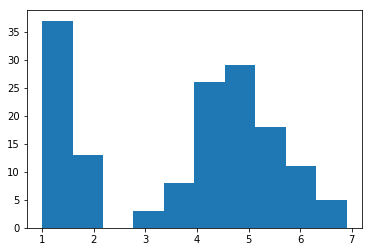

In [115]:
print(df.columns[2])
plt.hist(df[df.columns[2]])

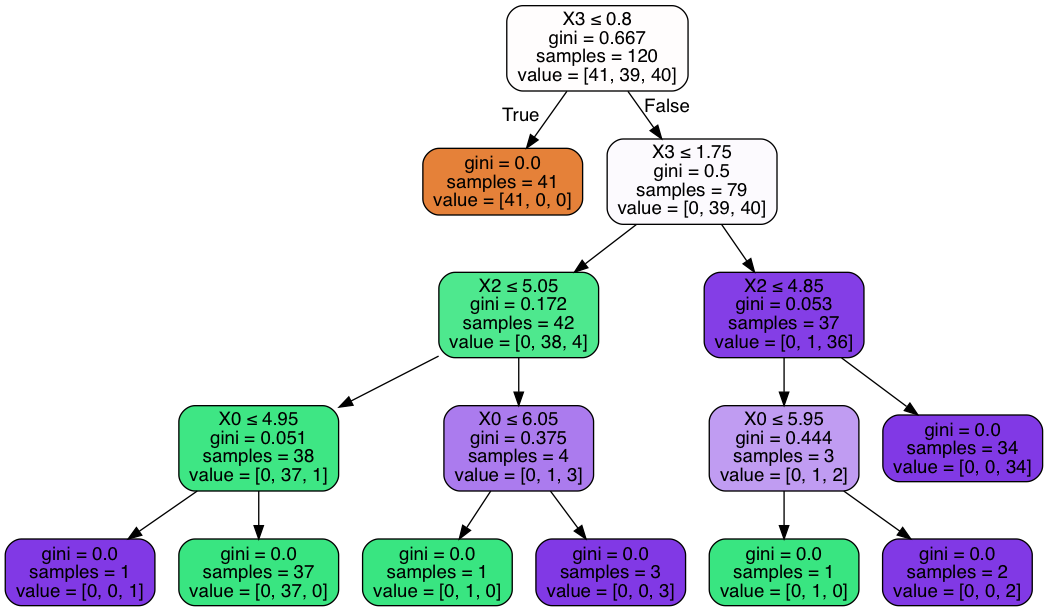

In [116]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### the depth of the search is leading overfitting
### the multicollinearity could lead to overfitting...lead bias

### If you're increasing robustness but test score stays stagnant, what does this indicate?

### Let's tune some hyperparameters

In [117]:
clf = DecisionTreeClassifier(min_samples_leaf=8)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [130]:
clf.score(xtrain, ytrain)

0.85

In [131]:
clf.score(xtest, ytest) # train score = 96% -> overfitting on training data

0.8666666666666667

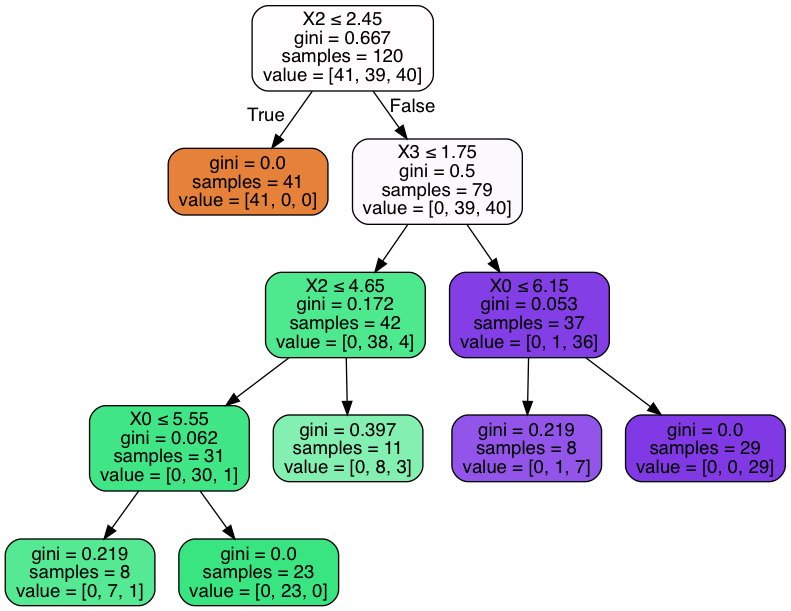

In [120]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Still have splits that are overfitting 'chasing' points.

In [121]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', min_samples_leaf=10, max_depth=3)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [122]:
clf.score(xtrain, ytrain)

0.85

In [123]:
clf.score(xtest, ytest) # train score = 96% -> overfitting on training data

0.8666666666666667

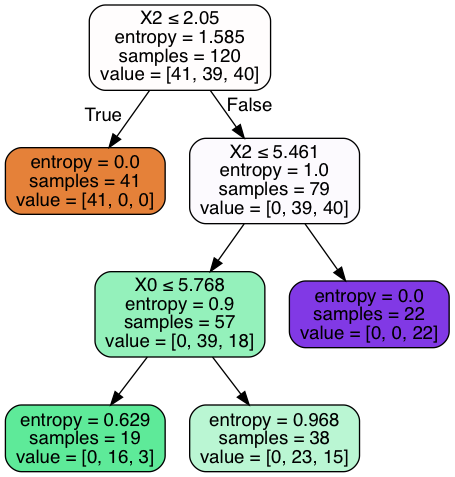

In [124]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### We tuned some hyperparameters, now let's look at attributes

In [125]:
feature_importance_vals = clf.feature_importances_
features = x.columns
feature_importance_vals, features

(array([0.01805655, 0.        , 0.98194345, 0.        ]),
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'))

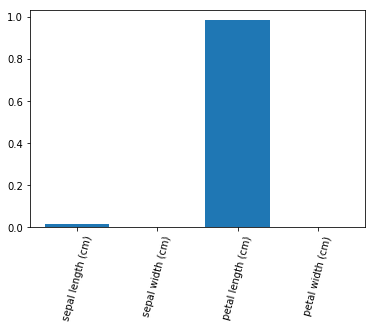

In [126]:
plt.bar(features, feature_importance_vals)
plt.xticks(features, features, rotation=75)
plt.show()

### Multicollinearity makes feature importances impossible to interpret

In [127]:
scipy.sparse.csr_matrix.todense(clf.decision_path(xtest)) # SHOWS THE NODES THAT INTERACT WITH EACH X VALUE AS 1

matrix([[1, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 0, 1, 0]])

In [16]:
xtest.shape

(30, 4)

In [17]:
xtest.iloc[0]

sepal length (cm)    6.0
sepal width (cm)     2.2
petal length (cm)    5.0
petal width (cm)     1.5
Name: 119, dtype: float64

In [18]:
clf.predict(xtest.iloc[0].values.reshape(1, -1))

array([1])

### Assessment
* Learned about overfitting decision trees - prone to overfitting
* Tuning hyperparameters
* Pruning the tree can prevent overfitting
    * Prune by limiting depth or limiting splits size requirements
* Assessing and taking actions from feature importances